In [1]:
# load and autoreload
from IPython import get_ipython
# noinspection PyBroadException
try:
    _magic = get_ipython().magic
    _magic('load_ext autoreload')
    _magic('autoreload 2')
except:
    pass
    

import os 
import glob
import sys
import pprint
import datetime as dt
import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.colors
import matplotlib.pyplot as plt 
import xarray as xr 
import seaborn as sns
import cartopy as crt

plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'

In [2]:
df = pd.read_excel('./data/ortiz-prado_2021.xlsx')

In [31]:
R,P,C,CP,TD,ED,EX,RR = ['Range', 'Province', 'Canton', 'Canton population', 'Total deaths',
       'Expected deaths', 'Excess deaths', 'Rate/100,000']
A = 'Elevation'
RA = 'ratio'

In [15]:
df[R].drop_duplicates().to_dict()

{0: 'Near sea level',
 10: 'Low altitude',
 20: 'Moderate altitude',
 30: 'High altitude'}

In [16]:
alt_dic={'Near sea level':250,
 'Low altitude':(2000+500)/2,
 'Moderate altitude':2500,
 'High altitude':(3000+5500)/2}

In [29]:
df[A] = df[R].replace(alt_dic)/1000

In [32]:
df[RA] = df[TD]/df[ED]

In [33]:
df = df.sort_values(CP)

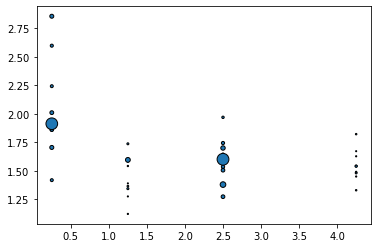

In [82]:
df1 = df.sort_values(A)
_x = df[A].values
_y = df[RA].values
_X = df[[A]]
import statsmodels.api as sm
import numpy as np

# include constant in ols models, which is not done by default
_x = sm.add_constant(_x)

model = sm.OLS(_y,_x)
results = model.fit()

s=results.summary2()
c1,x1 = s.tables[1]['[0.025']
c2,x2 = s.tables[1]['0.975]']

In [83]:
s

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.138   
Dependent Variable: y                AIC:                22.6653 
Date:               2021-12-30 00:07 BIC:                26.0430 
No. Observations:   40               Log-Likelihood:     -9.3326 
Df Model:           1                F-statistic:        7.260   
Df Residuals:       38               Prob (F-statistic): 0.0104  
R-squared:          0.160            Scale:              0.098278
-------------------------------------------------------------------
           Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
-------------------------------------------------------------------
const      1.8395     0.0845   21.7657   0.0000    1.6684    2.0106
x1        -0.0894     0.0332   -2.6944   0.0104   -0.1566   -0.0222
-----------------------------------------------------------------
Omnibus:              13.615       Durbin-Watson:          2.238 
Prob(Omnibus):        0.001        Jarque-Bera (JB):       16.655
Skew:                 1.044        Prob(JB):               0.000 
Kurtosis:             5.374        Condition No.:          5     
=================================================================

"""

In [84]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(_X,_y)
XX = _X.drop_duplicates()
yy = lr.predict(XX)

In [85]:
coef

0.08965934615861336

In [86]:
_y

array([1.49206349, 1.38983051, 1.671875  , 1.27522936, 1.62711864,
       1.58064516, 1.12195122, 1.45      , 1.60273973, 1.54205607,
       1.32947977, 1.82122905, 1.48591549, 1.3655914 , 1.54216867,
       1.48039216, 1.73660714, 1.34339623, 1.5141129 , 1.64619165,
       1.54044118, 1.96885813, 2.24184261, 1.41797961, 2.59695291,
       1.85866409, 1.7434555 , 1.88329764, 1.53577818, 1.50501002,
       1.8622101 , 1.27285714, 2.00982318, 2.85501066, 1.70466321,
       1.69985287, 1.595592  , 1.37906372, 1.91256042, 1.60095589])

In [87]:
coef= lr.coef_[0]

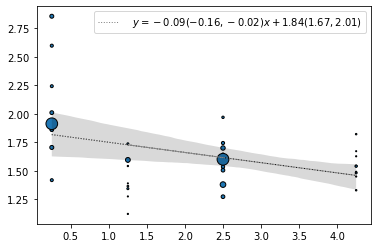

In [88]:
fy = f'  $y = {coef:.2f} ({x1:.2f},{x2:.2f}) x + {lr.intercept_:.2f}({c1:.2f},{c2:.2f})$'


f,ax = plt.subplots()
ax.scatter(df[A],df[RA],s=df[CP]/20000,
          edgecolor='k')
sns.regplot(x=_x[:,1],y=_y,scatter=False,line_kws={'lw':1,'color':'k','ls':':'},ax=ax)

ax.plot(XX.values[:,0],yy,ls=':',c='.5',lw=1,label=fy)
ax.legend()

In [89]:
s

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.138   
Dependent Variable: y                AIC:                22.6653 
Date:               2021-12-30 00:07 BIC:                26.0430 
No. Observations:   40               Log-Likelihood:     -9.3326 
Df Model:           1                F-statistic:        7.260   
Df Residuals:       38               Prob (F-statistic): 0.0104  
R-squared:          0.160            Scale:              0.098278
-------------------------------------------------------------------
           Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
-------------------------------------------------------------------
const      1.8395     0.0845   21.7657   0.0000    1.6684    2.0106
x1        -0.0894     0.0332   -2.6944   0.0104   -0.1566   -0.0222
-----------------------------------------------------------------
Omnibus:              13.615       Durbin-Watson:          2.238 
Prob(Omnibus):        0.001        Jarque-Bera (JB):       16.655
Skew:                 1.044        Prob(JB):               0.000 
Kurtosis:             5.374        Condition No.:          5     
=================================================================

"""